In [1]:
# If you're in a fresh Colab, you may need:
# !pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# For nicer plots (optional)
plt.style.use("seaborn-v0_8-whitegrid")

np.random.seed(90210)



Summary of dat:
                 x            y
count  1000.000000  1000.000000
mean      1.962085     9.995437
std       1.954808    16.742942
min       0.000086   -35.461872
25%       0.567592    -0.599250
50%       1.293690     7.157316
75%       2.741369    16.623061
max      11.486233   107.002077


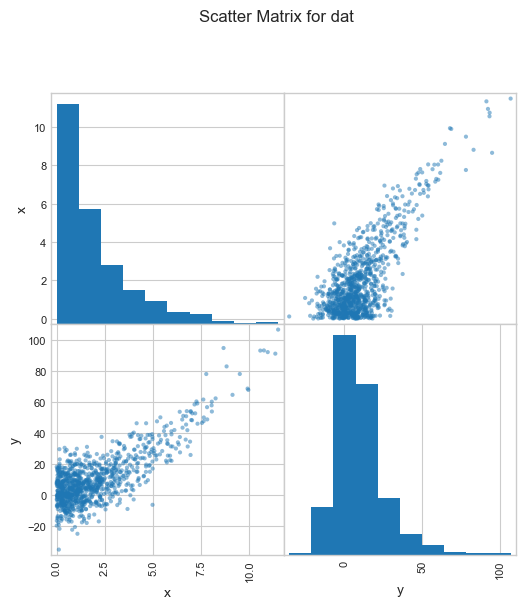

In [2]:
# ---------------------------------------------------------------------
# Marginal Effects for Non Linear Terms
# ---------------------------------------------------------------------

# Set up some data ----
dat = pd.DataFrame({
    "x": np.random.chisquare(df=2, size=1000)
})
dat["y"] = 2 + 1.5 * dat["x"] + 0.7 * dat["x"]**2 + np.random.normal(loc=0, scale=10, size=1000)

print("Summary of dat:")
print(dat.describe())

# pairs(dat) equivalent
pd.plotting.scatter_matrix(dat, figsize=(6, 6))
plt.suptitle("Scatter Matrix for dat", y=1.02)
plt.show()



In [3]:
# ---------------------------------------------------------------------
# Fit a model ----
# y ~ x + I(x^2)
# ---------------------------------------------------------------------
X = dat.drop("y", axis=1)

X['x_sq'] = X['x']**2

y = dat['y']

f = sm.OLS(y, sm.add_constant(X), data=dat).fit()



print("\nModel summary (f):")
print(f.summary())




Model summary (f):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     920.6
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          3.19e-227
Time:                        20:50:51   Log-Likelihood:                -3713.3
No. Observations:                1000   AIC:                             7433.
Df Residuals:                     997   BIC:                             7447.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0228      0.567

c:\Users\liula\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)


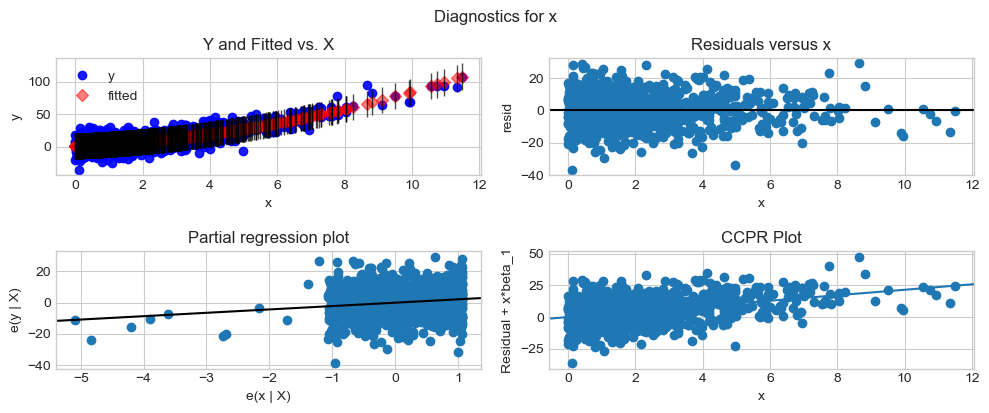

In [4]:
# Diagnostic plots
fig = plt.figure(figsize=(10, 4))
fig = sm.graphics.plot_regress_exog(f, "x", fig=fig)
plt.suptitle("Diagnostics for x", y=1.02)
plt.show()



In [5]:
# ---------------------------------------------------------------------
# Extract coefficients ----
# ---------------------------------------------------------------------

coefs = f.params  # a pandas Series: [Intercept, x, I(x ** 2)]
print("\nCoefficients (coefs):")
print(coefs)




Coefficients (coefs):
const    1.022766
x        2.159550
x_sq     0.617622
dtype: float64


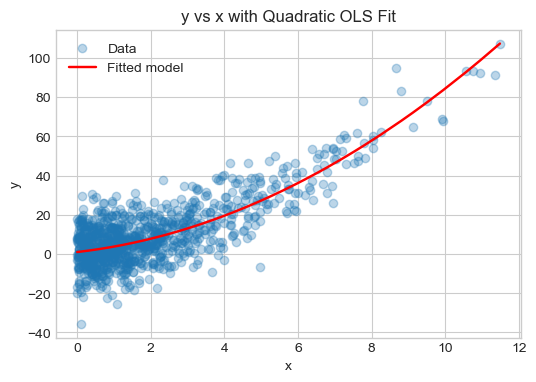

In [6]:
# ---------------------------------------------------------------------
# Plot our model and points
# ---------------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.scatter(dat["x"], dat["y"], alpha=0.3, label="Data")

y_hat = f.predict(sm.add_constant(X))

# Sort by x so the line is monotone in x
order = np.argsort(dat["x"])

plt.plot( # need to sort data to plot correctly
    dat["x"].iloc[order],
    y_hat.iloc[order],
    color="red",
    linewidth=1.75,
    label="Fitted model"
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x with Quadratic OLS Fit")
plt.legend()
plt.show()


In [ ]:
coefs

In [ ]:
# ---------------------------------------------------------------------
# Marginal effect: dy/dx = b1 + 2 * b2 * x
# ---------------------------------------------------------------------
b1 = coefs['x']
b2 = coefs['x_sq']

dat["mfx"] = b1 + 2 * b2 * dat["x"] #. this is from our formula, above

plt.figure(figsize=(6, 4))
plt.plot(dat["x"], dat["mfx"], linestyle="-")
plt.xlabel("x")
plt.ylabel("Marginal effect dy/dx")
plt.title("Marginal Effect of x on y")
plt.show()

print("\nSummary of marginal effects (dat$mfx):")
print(dat["mfx"].describe())



In [ ]:
# ---------------------------------------------------------------------
# Wait... but what if my model has a critical value? ----
# ---------------------------------------------------------------------
dat2 = pd.DataFrame({
    "x": dat["x"]
})
dat2["y"] = 2 - 1.5 * dat2["x"] + 0.7 * dat2["x"]**2 + np.random.normal(loc=0, scale=10, size=1000)

print("\nSummary of dat2:")
print(dat2.describe())

pd.plotting.scatter_matrix(dat2, figsize=(6, 6))
plt.suptitle("Scatter Matrix for dat2", y=1.02)
plt.show()



In [ ]:
# Fit model for dat2
X2 = dat2.drop("y", axis=1)

X2['x_sq'] = X2['x']**2

y2 = dat2['y']

f2 = sm.OLS(y2, sm.add_constant(X2), data=dat2).fit()


print("\nModel summary (f2):")
print(f2.summary())



In [ ]:
# Diagnostic plots
fig = plt.figure(figsize=(10, 4))
fig = sm.graphics.plot_regress_exog(f2, "x", fig=fig)
plt.suptitle("Diagnostics for x (f2)", y=1.02)
plt.show()



In [ ]:
# Plot model and points for dat2

plt.figure(figsize=(6, 4))
plt.scatter(dat2["x"], dat2["y"], alpha=0.3, label="Data")

y_hat = f2.predict(sm.add_constant(X2))

# Sort by x so the line is monotone in x
order = np.argsort(dat2["x"])

plt.plot( # need to sort data to plot correctly
    dat2["x"].iloc[order],
    y_hat.iloc[order],
    color="red",
    linewidth=1.75,
    label="Fitted model"
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("y vs x with Quadratic OLS Fit")
plt.legend()
plt.show()



In [ ]:
# Extract coefficients
coefs2 = f2.params

print("\nCoefficients (coefs2):")
coefs2



In [ ]:
# ---------------------------------------------------------------------
# Marginal effect: dy/dx = b1 + 2 * b2 * x
# ---------------------------------------------------------------------
b1 = coefs2['x']
b2 = coefs2['x_sq']

dat2["mfx"] = b1 + 2 * b2 * dat2["x"] #. this is from our formula, above

plt.figure(figsize=(6, 4))
plt.plot(dat2["x"], dat2["mfx"], linestyle="-")
plt.xlabel("x")
plt.ylabel("Marginal effect dy/dx")
plt.title("Marginal Effect of x on y")
plt.show()

print("\nSummary of marginal effects (dat2$mfx):")
print(dat2["mfx"].describe())



In [ ]:
# ---------------------------------------------------------------------
# Estimate the critical point by finding x where mfx is closest to zero
# ---------------------------------------------------------------------
idx_crit = (dat2["mfx"]**2).idxmin() # gives an index of the minimum point

critical_point_estimate = dat2.loc[idx_crit, "x"] # what is the minimum?
# i.e., where the marginal effect is closest to zero, going from negative
# to positive

print("\nEstimated critical point (from grid search on mfx ~ 0):")

print(critical_point_estimate)



In [ ]:
# ---------------------------------------------------------------------
# Summaries of marginal effect before & after critical point ----
# ---------------------------------------------------------------------
before = dat2.loc[dat2["x"] < critical_point_estimate, "mfx"]
after  = dat2.loc[dat2["x"] >= critical_point_estimate, "mfx"]

print("\nSummary of mfx for x < critical point:")
print(before.describe())


In [ ]:

print("\nSummary of mfx for x >= critical point:")
print(after.describe())
